In [1]:
# HCASE Experiments Altered t-SNE Reduced HCASE Space CherryPicked Scaffolds
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [2]:
import pandas as pd

import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import morgantsne


import sys
import pandas as pd
import rdkit
from rdkit import Chem
from scaffold_keys import smiles2bmscaffold, smiles2scaffoldkey, sk_distance


import numpy as np
from sklearn.manifold import TSNE

import math

from knn import get_mol, get_fingerprint

In [3]:
# Config section



fname_ref_scaffolds = '../data/red_hc_space.tab'

fname_cp_scaffolds = '../data/cherrypicked_scaffolds.tab'



#fname_out_drug_tSNE_embedding = '../data/drug_tSNE_embedding.tab'

#fname_out_drugs_knn_tsne_plot = '../plots/tsne/orig_tsne.png'

#fname_out_reduced_drug_tSNE_embedding = '../data/reduced_drug_tSNE_embedding.tab'

#fname_out_red_drugs_knn_tsne_plot = '../plots/tsne/red_orig_tsne.png'

fname_out_cp_scaffolds_altered_tsne_plot = '../plots/tsne/si_reduced_altered_tsne_cp_scaffolds.png'

fname_out_chembl_scaffolds_tsne_embedding = '../data/si_reduced_altered_tsne_embedding_cp_scaffolds.tab'

# t-SNE parameters

metric = 'jaccard'
perplexity_values = [5, 10, 20, 30, 40, 50]
learning_rate = 200.0
n_iter = 1000
n_jobs = 4


# Morgan fingerprint parameters

fp_radius = 3
fp_length = 2048




do_sampling = False

random_seed = 55555
sample_size = 100
sample_fraction = 0.9




In [4]:
# Import datasets

df_ref_scaffolds = pd.read_csv (fname_ref_scaffolds, sep = '\t')

df_cp_scaffolds = pd.read_csv(fname_cp_scaffolds, sep ='\t')



In [5]:
print (df_cp_scaffolds.head)

<bound method NDFrame.head of                                              structure  order  \
0                                C1=C(NCc2cccnc2)NCNC1   4950   
1                                O=C1OCCN=C1NNc1ccccc1   4951   
2                               O=C1OCOC=C1N=Nc1ccccc1   4952   
3                                  C1=NCNCN1CCc1ccccc1   4953   
4                                C1=NCN(CCc2ccccc2)CN1   4954   
..                                                 ...    ...   
904  O=S(=O)(N=Cc1ccc(N2CCN(Cc3ccccc3-c3ccccc3)CC2)...  55046   
905  O=C(NS(=O)(=O)c1ccc(NCC2CCOCC2)cc1)c1ccc(N2CCN...  55047   
906  O=C1C[C@@H](O[C@H]2CCCCO2)C[C@@H](O[C@H]2CCCCO...  55048   
907  C(CC[C@H]1CCC2C(CC[C@H]3[C@@H]4CCCC4CC[C@H]23)...  55049   
908  O=C(Nc1ccc2c(c1)CN[C@H](C(=O)N[C@@H]1CCCc3cccc...  55050   

         scaffold_id                                       scaffold_key  color  
0     scaffold.20148  14 2 3 2 0 6 1 1 4 0 0 0 4 4 0 0 0 4 0 0 0 2 0...      1  
1     scaffold.26725  14 2 

In [6]:
# Clean-up datasets

df_ref_scaffolds = df_ref_scaffolds.rename (columns = {'scaffold_id': 'id'})

print (df_ref_scaffolds.head)

<bound method NDFrame.head of                                                structure  order  \
0                                                C=C1CC1      1   
1                                                  C1CN1      2   
2                                             C1C[NH2+]1      3   
3                                                  C1CS1      4   
4                                                 C1=NC1      5   
...                                                  ...    ...   
50114  O=C1CCSSC[C@@H]2NC(=O)[C@@H]3CSSC[C@@H](C(=O)N...  50115   
50115  O=C(NCC(=O)N1Cc2ccccc2C[C@H]1C(=O)N1CC2CCCCC2[...  50116   
50116  S=P(N/N=C/c1ccc(OP2(Oc3ccc(/C=N/NP(=S)(Oc4cccc...  50117   
50117  O=C(CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)...  50118   
50118  O=C(CNC(=O)[C@@H]1C2CCCCC2CN1C(=O)[C@@H]1Cc2cc...  50119   

                    id                                       scaffold_key  
0          scaffold.10  3 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
1           s

In [7]:
# Sampling

if do_sampling:
    df_ref_scaffolds = df_ref_scaffolds.sample (n = sample_size, random_state = random_seed)
    
    print (df_ref_scaffolds.shape[0])
    print (df_ref_scaffolds.head)

In [8]:
# Functions


def panel_plot_multi_scaffolds (subfig, df, subfig_label):


    # Comment this out if you want image titles.
    #plt.title (title)


    tab10_palette = ['#1179B0', '#F58C30', '#74BB5A', '#BC412C', '#795B9A', '#764A0C', '#D37DB5', '#7A7A7A', '#B8C449']

    
    df_1 = df[df['color'] == 1].copy()
    #print(df_1.shape)
    
    

    
    

    
    
    df_2 = df[df['color'] == 2].copy()
    df_3 = df[df['color'] == 3].copy()
    df_4 = df[df['color'] == 4].copy()
    df_5 = df[df['color'] == 5].copy()
    df_6 = df[df['color'] == 6].copy()
    df_7 = df[df['color'] == 7].copy()
    df_8 = df[df['color'] == 8].copy()
    df_9 = df[df['color'] == 9].copy()


    color_1 = list(df_1['color'])[0] - 1
    color_2 = list(df_2['color'])[0] - 1
    color_3 = list(df_3['color'])[0] - 1
    color_4 = list(df_4['color'])[0] - 1
    color_5 = list(df_5['color'])[0] - 1
    color_6 = list(df_6['color'])[0] - 1
    color_7 = list(df_7['color'])[0] - 1
    color_8 = list(df_8['color'])[0] - 1
    color_9 = list(df_9['color'])[0] - 1
 





    subfig.scatter(df_1['Dim_1'].values, df_1['Dim_2'].values, c = tab10_palette[color_1], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_2['Dim_1'].values, df_2['Dim_2'].values, c = tab10_palette[color_2], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_3['Dim_1'].values, df_3['Dim_2'].values, c = tab10_palette[color_3], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_4['Dim_1'].values, df_4['Dim_2'].values, c = tab10_palette[color_4], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_5['Dim_1'].values, df_5['Dim_2'].values, c = tab10_palette[color_5], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_6['Dim_1'].values, df_6['Dim_2'].values, c = tab10_palette[color_6], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_7['Dim_1'].values, df_7['Dim_2'].values, c = tab10_palette[color_7], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_8['Dim_1'].values, df_8['Dim_2'].values, c = tab10_palette[color_8], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_9['Dim_1'].values, df_9['Dim_2'].values, c = tab10_palette[color_9], alpha = 0.3, marker = 'o', s = 100)

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    


def color_scaffolds (df_coords, df_color):
    df = df_coords.merge(df_color, on = 'id', how = 'inner')
    
    return (df)


In [9]:
print (df_ref_scaffolds.columns)

Index(['structure', 'order', 'id', 'scaffold_key'], dtype='object')


In [10]:
# Workflow
# Altered tSNE embedding of full data set

df_res = pd.DataFrame ()
first = True
for i in range(len(perplexity_values)):
    perplexity_val = perplexity_values[i]

    df_embedding = morgantsne.embed(df_ref_scaffolds, perplexity_val, fp_radius, fp_length, metric, random_seed,  learning_rate, n_iter)
    df_embedding['perplexity'] = perplexity_val
    df_embedding['fp_type'] = 'Morgan impl. in RDKit'
    df_embedding['fp_radius'] = fp_radius
    df_embedding['fp_length'] = fp_length
    
    if first:
        df_res = df_embedding
        first = False
    
    else:
        df_res = df_res.append (df_embedding, ignore_index = True)

        
df_res = df_res[['id', 'Dim_1', 'Dim_2', 'structure', 'fp_str', 'fp_type', 'fp_radius', 'fp_length', 'perplexity']].copy()


df_res.to_csv (fname_out_chembl_scaffolds_tsne_embedding, sep = '\t', index = False)


[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 5, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done
[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 10, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done
[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 20, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done
[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 30, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done
[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 40, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done
[*] Computing t-SNE embedding using Morgan fingerprints (rad: 3, length: 2048) applying metric: jaccard, perplexity 50, learning rate: 200.000000, n_iteration: 1000  ... 


/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/zahoo/anaconda3/envs/hcase/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1875: DataConv

 .. done


In [11]:
print (df_res.head)

<bound method NDFrame.head of                      id      Dim_1      Dim_2  \
0           scaffold.10 -73.083359 -20.927790   
1            scaffold.5 -77.369598 -20.512108   
2            scaffold.6 -79.490486 -17.450064   
3            scaffold.3 -80.889488 -21.092627   
4            scaffold.7 -76.606705 -15.461044   
...                 ...        ...        ...   
300709  scaffold.523327 -51.725178 -49.832485   
300710  scaffold.523193  17.932150 -52.121895   
300711  scaffold.523089  55.351181 -14.687083   
300712  scaffold.523402  16.147396 -53.715233   
300713  scaffold.523371  17.925611 -52.142876   

                                                structure  \
0                                                 C=C1CC1   
1                                                   C1CN1   
2                                              C1C[NH2+]1   
3                                                   C1CS1   
4                                                  C1=NC1   
...            

df_colored

   color               id      Dim_1      Dim_2  \
0      1   scaffold.20148  15.987617  21.944199   
1      2   scaffold.60717   3.533926   6.616040   
2      3   scaffold.95547  17.681551 -25.120111   
3      4  scaffold.190352   9.968300 -38.782940   
4      5  scaffold.181666 -20.454857  16.955318   
5      6  scaffold.243621 -32.384270  55.401028   
6      7  scaffold.326821  20.709560  28.763794   
7      8  scaffold.307272  32.364769  62.822342   
8      9  scaffold.509858 -62.572342 -53.188427   

                                         structure_x  \
0                              C1=C(NCc2cccnc2)NCNC1   
1                         c1ccc(CCc2cccc3ccccc23)cc1   
2                   O=C(NC[C@H]1CC2CCN1CC2)Nc1ccccc1   
3         O=S(=O)(N[C@@H]1CCc2cc3ccccc3n2C1)c1ccccc1   
4        O=C([C@@H]1CNCCN1)N(Cc1ccc2cn[nH]c2c1)C1CC1   
5       c1ccc2[nH]c(C3CN(c4cc(-n5cccn5)ncn4)C3)nc2c1   
6  C(=Nc1cccc(-c2ncnc3[nH]c(C4=CCNCC4)cc23)c1)N1CCC1   
7           C(#Cc1ccc2c(Nc3cc

<Figure size 640x480 with 0 Axes>

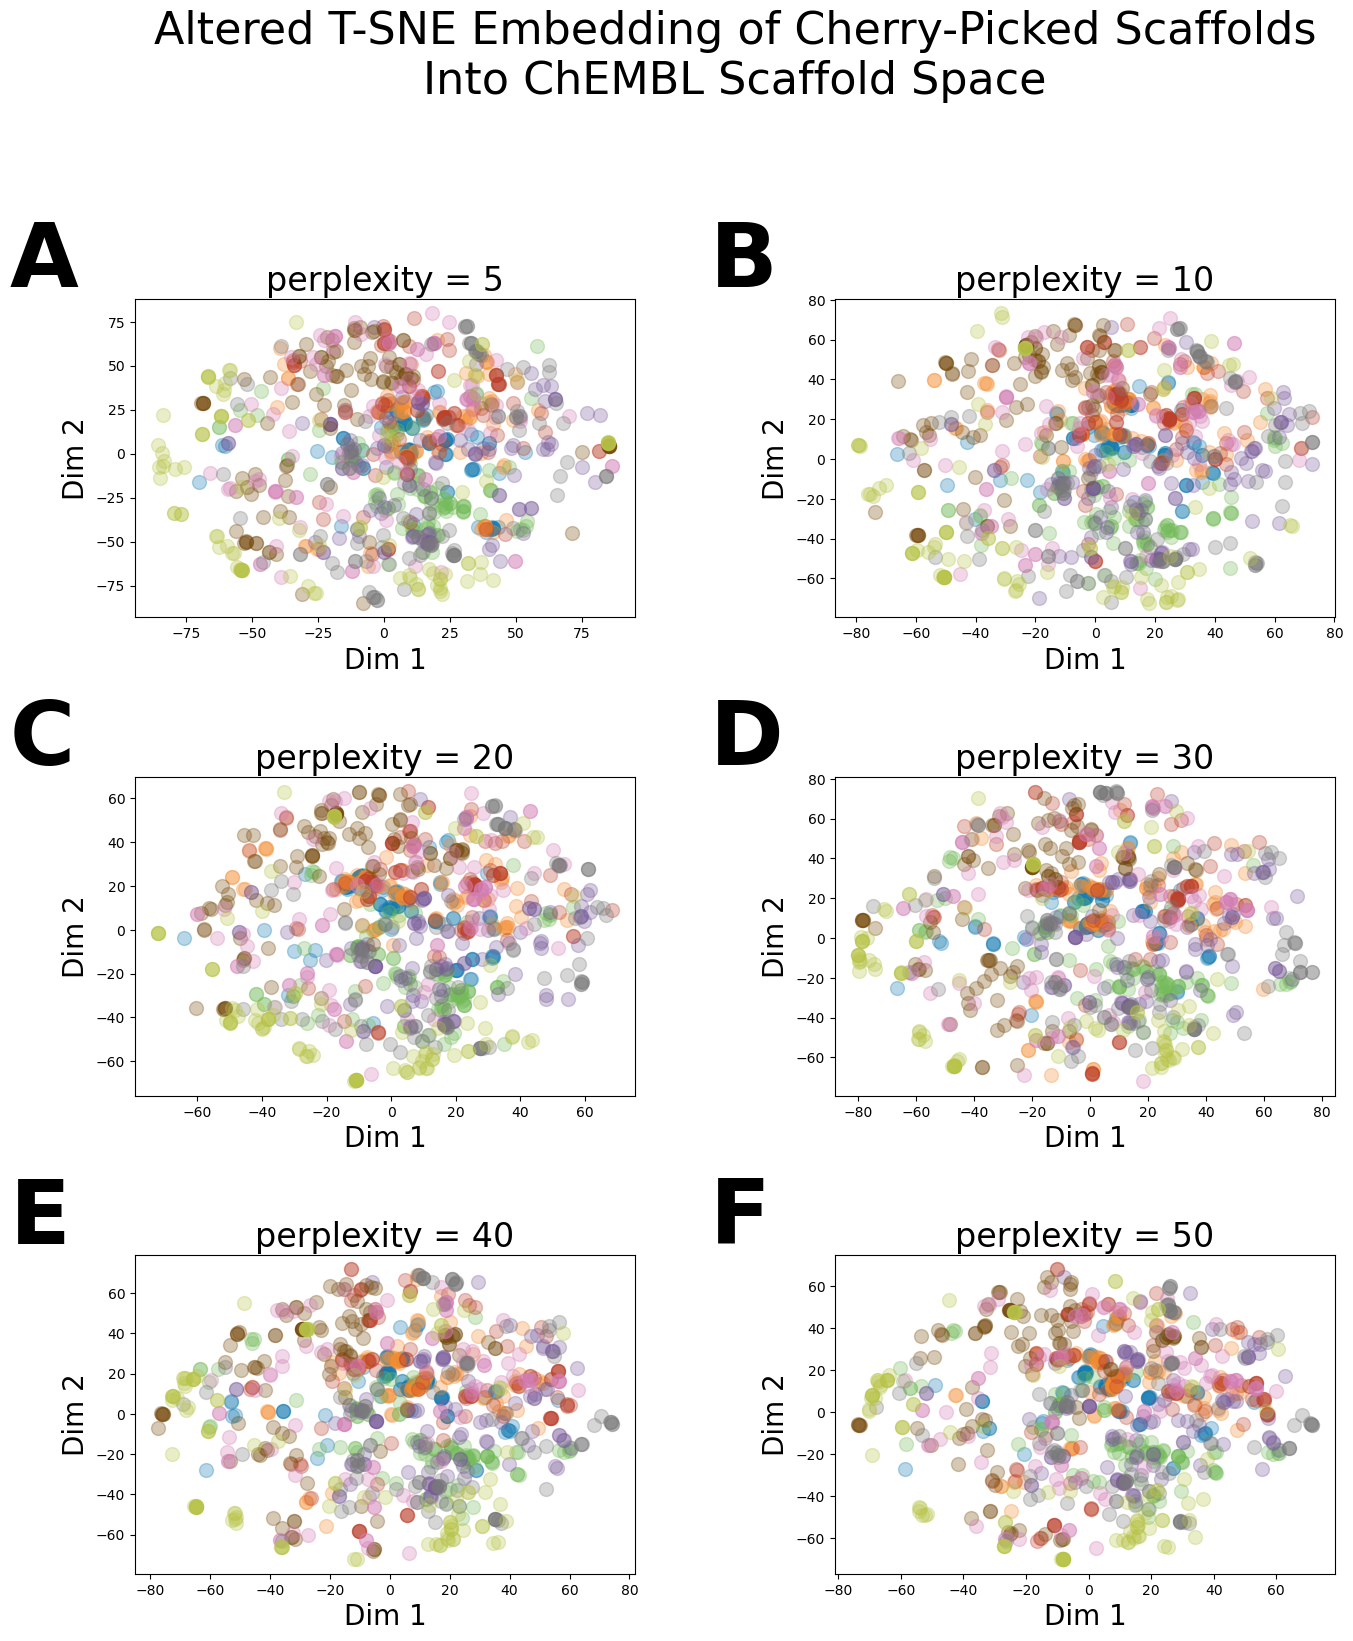

In [12]:
# Plotting
# Full data set


#print (df_cp_scaffolds.head)
#print (df_res.head)


df_cp = df_cp_scaffolds.copy()

df_cp = df_cp.rename(columns = {'scaffold_id': 'id'})

#df_emb = df_embedded


fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 17))



for i in range(len(perplexity_values)):
    perplexity_val = perplexity_values[i]
    df_embedded = df_res[df_res['perplexity'] == perplexity_val].copy()
    df_colored = color_scaffolds(df_embedded, df_cp)
    print ("df_colored\n")

    #print (df_colored.shape)
    #print (df_colored.head)
    df_x = df_colored.groupby(['color'], as_index = False).agg('first').copy()
    print (df_x)
    print ("df_colored_end\n")
    
    panel_x = int (math.floor(float(i) / 2.0))
    panel_y = i % 2

    
    subfig_label = 'perplexity = ' + str(perplexity_val)
    
    panel_plot_multi_scaffolds (subfigures[panel_x][panel_y], df_colored, subfig_label)

    
fig.suptitle('Altered T-SNE Embedding of Cherry-Picked Scaffolds\nInto ChEMBL Scaffold Space', fontsize = 32, y = 1.02)



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.5)


subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][0].text(-0.25, 1.25, "E", transform=subfigures[2][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[2][1].text(-0.25, 1.25, "F", transform=subfigures[2][1].transAxes,
            fontsize=64, fontweight='bold', va='top')




plt.savefig (fname_out_cp_scaffolds_altered_tsne_plot, dpi=300)

plt.show()



#do_analysis (df_drugs, df_knn, perplexity_val)
#do_left_out_analysis (df_drugs, df_knn, perplexity_val)



In [13]:
# References:

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jaccard.html#scipy.spatial.distance.jaccard
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
# Ref: https://sourceforge.net/p/rdkit/mailman/message/24426410/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://stackoverflow.com/questions/46113732/modulenotfounderror-no-module-named-sklearn
# Ref: https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/



